In [2]:
import pandas as pd

cv_df = pd.read_parquet('./data/clean/cv.parquet')
vacancies_df = pd.read_parquet('./data/clean/vacancies.parquet')

cv_df.head()
vacancies_df.head()

,id,stateRegionCode,vacancyName,codeProfession,codeProfessionalSphere,professionalSphereName,vacancyAddress,vacancyAddressHouse,vacancyAddressAdditionalInfo,geo,...,hireDate,workPlace,medicalCertificate,scheduleTypeComment,benefitDetails,trainingDays,shift,medicalDocument,benefit,conditions
9,1bdfbcb0-f9b1-11ef-9ae2-25abf1fceba2,7700000000000,Продавец-кассир,None,Sales,"Продажи, закупки, снабжение, торговля","Город Москва, 1-й Грайвороновский проезд",None,"Россия, г Москва, 1-й Грайвороновский проезд, ...","{""latitude"": 55.720874, ""longitude"": 37.725595}",...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,None
21,464a0d88-c5b7-11ef-96bd-29eee561bb17,7700000000000,Главный специалист направления PDM систем,209204,InformationTechnology,"Информационные технологии, телекоммуникации, с...","Город Москва, Озерковская набережная, 30",30,ООО АЛРОСА Информационные технологии,"{""latitude"": 55.738019, ""longitude"": 37.638}",...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,Допустимые
25,23e60dd5-b130-11ee-9b60-cb26dff57dd7,7700000000000,Экономист,277409,AccountingTaxesManagement,"Бухгалтерия, налоги, управленческий учет","Город Москва, Хромова улица, дом 24",дом 24,None,"{""latitude"": 55.799973, ""longitude"": 37.719998}",...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,Оптимальные
33,1f58a7f8-ddf3-11ef-9bbd-d549be31d974,7700000000000,Главный специалист отдела поддержки бизнеса,208894,InformationTechnology,"Информационные технологии, телекоммуникации, с...","Город Москва, 1812 года улица, 14",14,ООО АЛРОСА Информационные технологии,"{""latitude"": 55.742924, ""longitude"": 37.520132}",...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,Допустимые
40,4bc2c13a-f7e9-11ef-9741-e7d0d2cf29b1,7700000000000,Врач-офтальмолог,204484,Medicine,Здравоохранение и социальное обеспечение,"Город Москва, Трехгорный Вал улица, дом 6А",дом 6А,None,"{""latitude"": 55.758884, ""longitude"": 37.56079}",...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,Допустимые


# Гистограммы и диаграммы рассеяния

In [14]:
def find_name(code, json_data):
    for item in json_data:
        try:
            if item['code'] == code:
                    if (item['type'] in ['int', 'bool', 'boolean']):
                        return item['name'], item['type']
        except:
            return False
    return False


100%|██████████| 80/80 [00:03<00:00, 24.92it/s]


Rendering 18


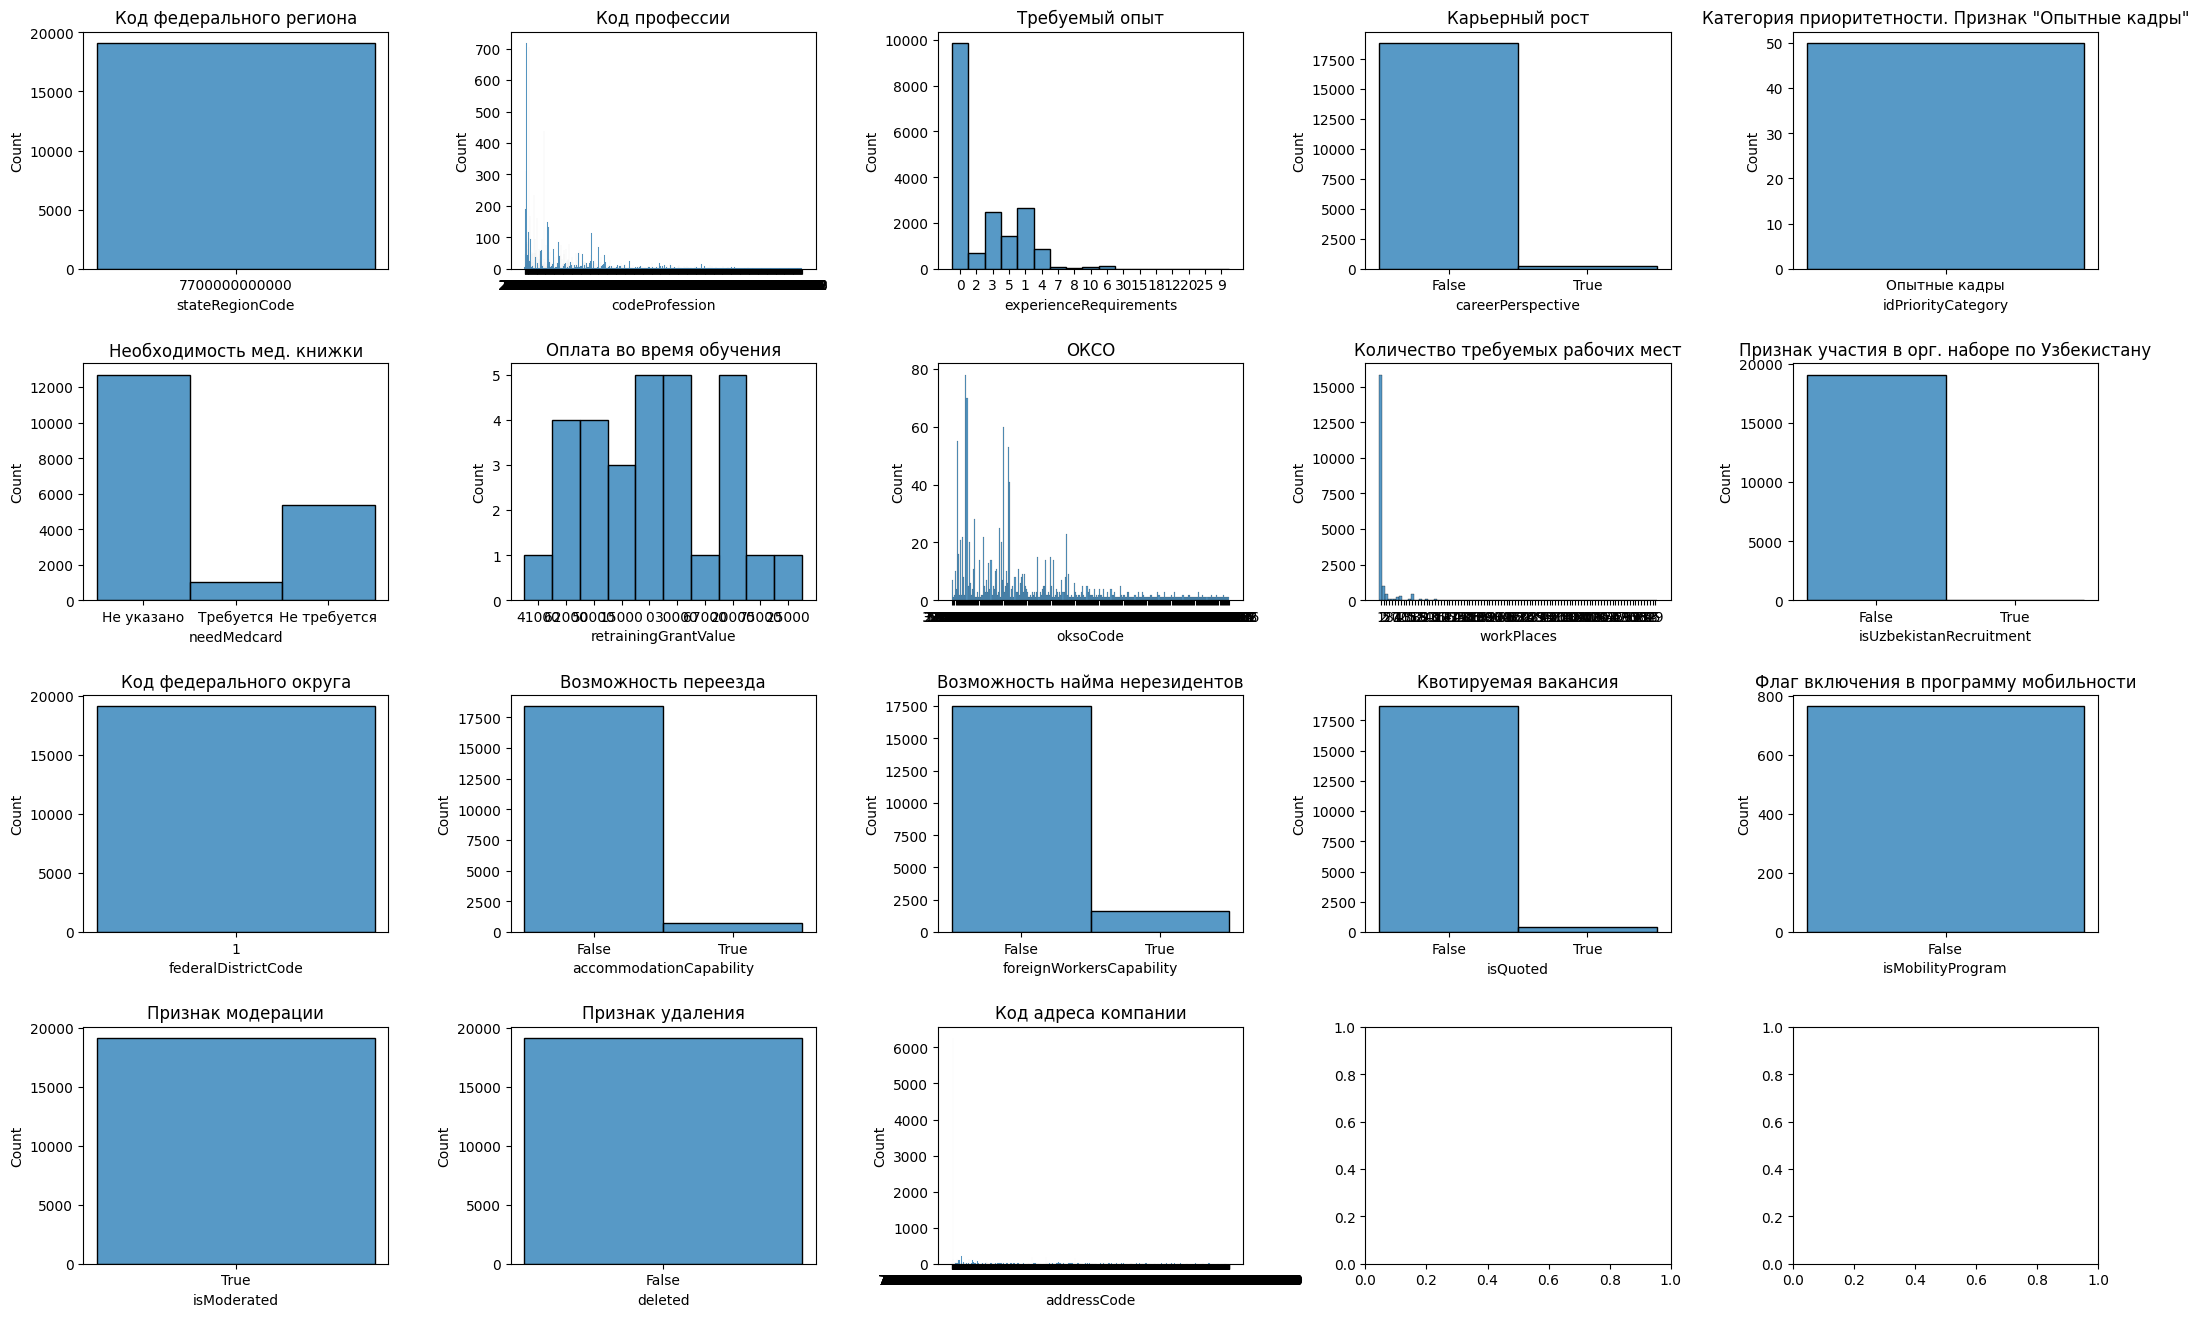

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
from tqdm import tqdm

fig, axs = plt.subplots(4, 5, figsize=(26,16))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

with open('./data/vacancies_attributes.json', 'r') as f:
    attr_data = json.load(f)

    i = 0
    for attr in tqdm(list(vacancies_df.columns)):
        if (not find_name(attr, attr_data)):
            continue

        attr_name, attr_type = find_name(attr, attr_data)
        sns.histplot(vacancies_df[attr], ax=axs[i // 5][i % 5])
        axs[i // 5][i % 5].set_title(attr_name)
        i += 1

print('Rendering', i)

100%|██████████| 49/49 [00:01<00:00, 38.85it/s]


Rendering 5


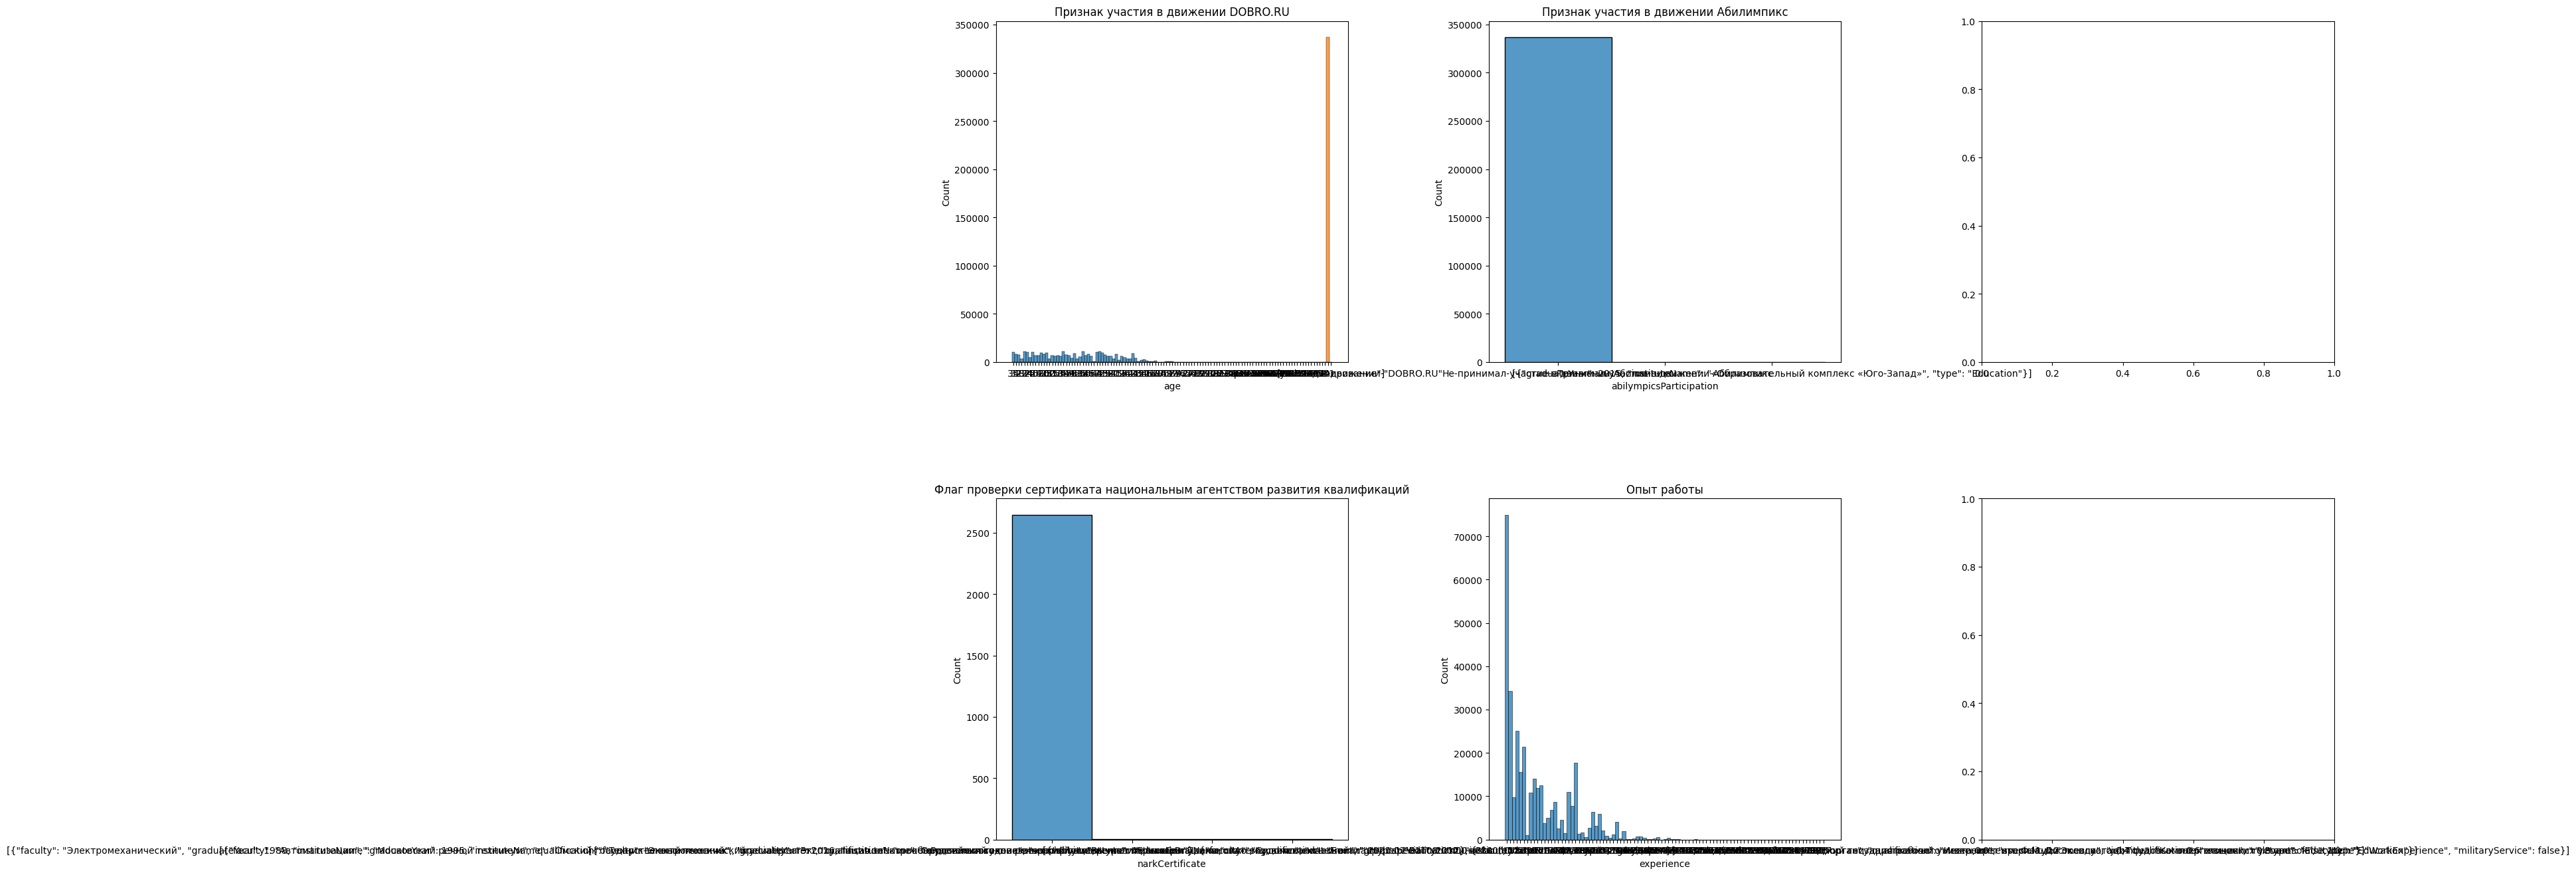

In [24]:
fig, axs = plt.subplots(2, 3, figsize=(26,16))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

with open('./data/cv_attributes.json', 'r') as f:
    attr_data = json.load(f)

    i = 0
    for attr in tqdm(list(cv_df.columns)):
        if (not find_name(attr, attr_data)):
            continue

        attr_name, attr_type = find_name(attr, attr_data)
        sns.histplot(cv_df[attr], ax=axs[i // 3][i % 2])
        axs[i // 3][i % 2].set_title(attr_name)
        i += 1

print('Rendering', i)